In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import pandas as pd
import pprint
import matplotlib.pyplot as plt
import glob
from collections import OrderedDict
pp = pprint.PrettyPrinter(depth=6)
import get_ttest as gtt

No significant results in threshold of : 16%
No significant results in threshold of : 28%
No significant results in threshold of : 12%
No significant results in threshold of : 36%
No significant results in threshold of : 20%
No significant results in threshold of : 24%
No significant results in threshold of : 32%
No significant results in threshold of : 40%


In [2]:
def draw_graphs(data, ttest, metric, rad, thrs, s='S',ymin=0, ymax=1, xmin=10, xmax= 42):
    
    for i in range(len(data)):
        
        thresh = data[i]['thresh_percent']
        SADS = data[i]['groups'].get_group(('Case', s))
        HCS = data[i]['groups'].get_group(('Healthy Control', s))
 
        y1error = SADS[metric].std()
        y2error = HCS[metric].std()
        plt.errorbar(np.array(thresh), SADS[metric].mean(), yerr=y1error, color='red', marker='D')
        plt.errorbar(np.array(thresh), HCS[metric].mean(), yerr=y2error, color='blue', marker='D')
        
    
    for j in range(len(ttest)):
        
        temp2 = ttest[j]['rejected_norm']
        if metric in temp2:
             plt.plot(t[j]['thresh_percent'], ymax-(0.05*ymax), color='yellow', marker='^', markersize=12)
            # pass
        try:
            temp = ttest[j]['rejected_ttest'][metric]
            plt.plot(t[j]['thresh_percent'], ymax-(0.05*ymax), 'k*', markersize=12)
        except:
            pass
        
  #COMMENT IN FOR SHOWING WHICH OF THE NORMAL DISTRIBUTION T-TEST THAT FAILS     
  #  for k in range(len(thrs)):
  #      
  #      try:
  #          temp3 = rad[thrs[k]]['HC']['rejected'][metric]
  #          plt.plot(thrs[k], ymin+(0.05*ymin), marker='p', color='red', markersize=12)
  #      except:
  #          pass
  #      
  #      try:
  #          temp4 = rad[thrs[k]]['SAD']['rejected'][metric]
  #          plt.plot(thrs[k], ymin+(0.05*ymin), marker='p', color='blue', markersize=12)
  #      except:
  #          pass

    if s == 'S':
        season = 'Summer'
    else:
        season = 'Winter'

    plt.axis([xmin, xmax, ymin, ymax])
    plt.xlabel('Sparsity threshold %')
    plt.ylabel('Global mean ')
    plt.title(season + " : " + metric)

In [3]:
#T-TESTING WHEN KS-TEST FOR NORMAL DISTRIBUTION IS USED

In [4]:
kwdata = gtt.gtt_main(WS='W',nt='ks')
kwt = kwdata[0]
kwd = kwdata[1]
kwr = kwdata[2]
kwp = kwdata[3]

No significant results in threshold of : 16%
No significant results in threshold of : 28%
No significant results in threshold of : 12%
No significant results in threshold of : 36%
No significant results in threshold of : 20%
No significant results in threshold of : 24%
No significant results in threshold of : 32%
No significant results in threshold of : 40%


In [6]:
kdata = gtt.gtt_main(WS='S',nt='ks')
kt = kdata[0]
kd = kdata[1]
kr = kdata[2]
kp = kdata[3]

No significant results in threshold of : 16%
No significant results in threshold of : 28%
No significant results in threshold of : 12%
No significant results in threshold of : 36%
No significant results in threshold of : 20%
No significant results in threshold of : 24%
No significant results in threshold of : 32%
No significant results in threshold of : 40%


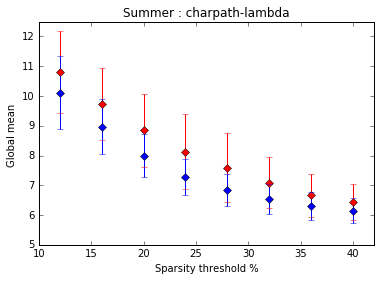

In [7]:
draw_graphs(kd,kt,'charpath-lambda', kr, kp,ymin=5,ymax=12.5)

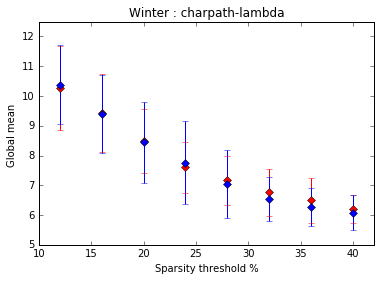

In [8]:
draw_graphs(kwd,kwt,'charpath-lambda', kwr, kwp,s='W',ymin=5,ymax=12.5)

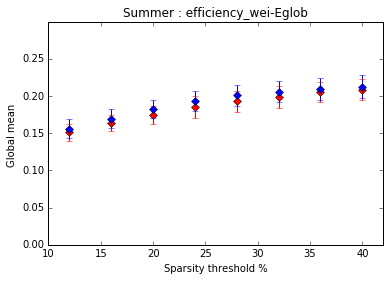

In [9]:
draw_graphs(kd,kt,'efficiency_wei-Eglob', kr, kp, ymin=0,ymax=0.3)

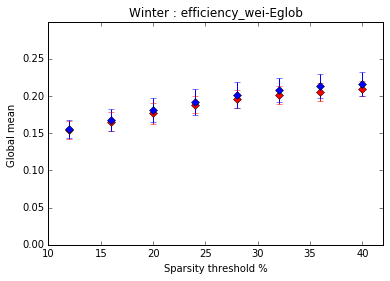

In [10]:
draw_graphs(kwd,kwt,'efficiency_wei-Eglob', kwr, kwp,s='W', ymin=0,ymax=0.3)

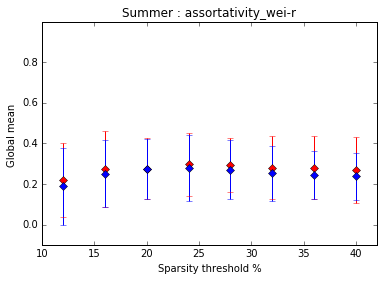

In [24]:
draw_graphs(kd,kt,'assortativity_wei-r',kr,kp,ymin=-0.1,ymax=1.0)

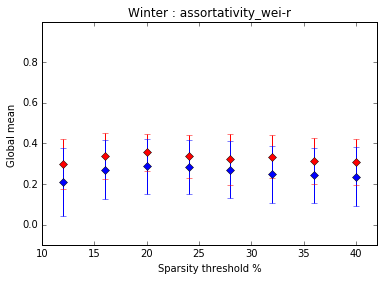

In [25]:
draw_graphs(kwd,kwt,'assortativity_wei-r',kwr,kwp,s='W',ymin=-0.1,ymax=1.0)

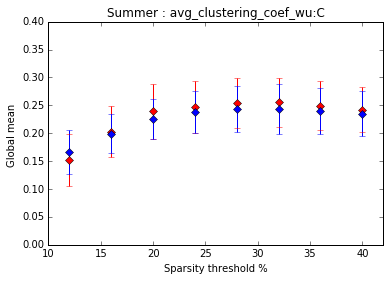

In [13]:
draw_graphs(kd,kt,'avg_clustering_coef_wu:C',kr,kp,ymin=0,ymax=0.4)

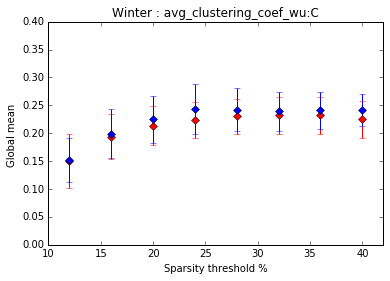

In [14]:
draw_graphs(kwd,kwt,'avg_clustering_coef_wu:C',kwr,kwp,s='W',ymin=0,ymax=0.4)

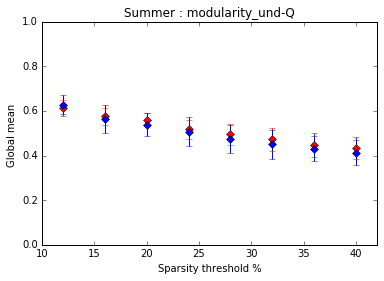

In [16]:
draw_graphs(kd,kt,'modularity_und-Q',kr,kp,ymin=0,ymax=1.0)

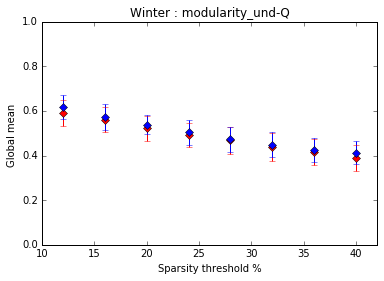

In [17]:
draw_graphs(kwd,kwt,'modularity_und-Q',kwr,kwp,s='W',ymin=0,ymax=1.0)

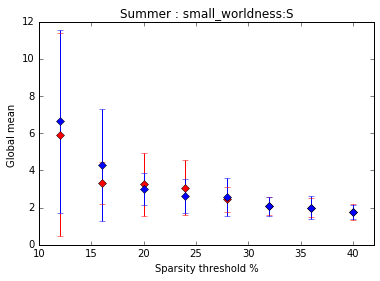

In [21]:
draw_graphs(kd,kt,'small_worldness:S',kr,kp,ymin=0,ymax=12.0)

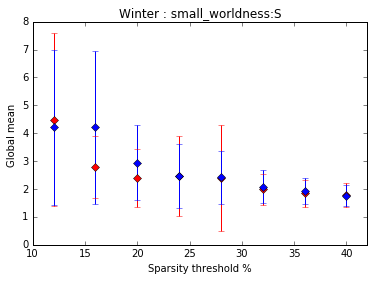

In [19]:
draw_graphs(kwd,kwt,'small_worldness:S',kwr,kwp,s='W',ymin=0,ymax=8.0)

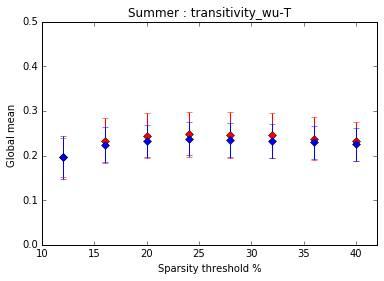

In [22]:
draw_graphs(kd,kt,'transitivity_wu-T',kr,kp,ymin=0,ymax=0.5)

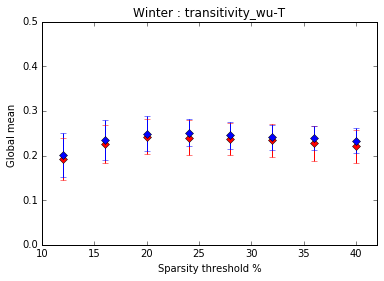

In [23]:
draw_graphs(kwd,kwt,'transitivity_wu-T',kwr,kwp,s='W',ymin=0,ymax=0.5)